<a href="https://colab.research.google.com/github/Vismayamohan17/data-science-assignment/blob/main/Daily_task_Missing_value_Outlier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('/content/churn-data-v2 (1).csv')
df

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0.38,530.0,two,157.0,3+,no,yes,no,sales,low
1,0.80,860.0,five,262.0,6+,no,yes,no,sales,medium
2,0.11,880.0,seven,272.0,4+,no,yes,no,sales,medium
3,0.72,870.0,five,223.0,5+,no,yes,no,sales,low
4,0.37,520.0,two,159.0,3+,no,yes,no,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,570.0,two,151.0,3+,no,yes,no,support,low
14995,0.37,480.0,two,160.0,3+,no,yes,no,support,low
14996,0.37,530.0,two,143.0,3+,no,yes,no,support,low
14997,0.11,960.0,six,280.0,4+,no,yes,no,support,low


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   satisfaction          14990 non-null  float64
 1   evaluation            14936 non-null  float64
 2   number_of_projects    14955 non-null  object 
 3   average_montly_hours  14973 non-null  float64
 4   time_spend_company    14999 non-null  object 
 5   work_accident         14999 non-null  object 
 6   churn                 14999 non-null  object 
 7   promotion             14999 non-null  object 
 8   department            14958 non-null  object 
 9   salary                14999 non-null  object 
dtypes: float64(3), object(7)
memory usage: 1.1+ MB


In [4]:
df.isna().sum()

,0
satisfaction,9
evaluation,63
number_of_projects,44
average_montly_hours,26
time_spend_company,0
work_accident,0
churn,0
promotion,0
department,41
salary,0


In [5]:
null_columns = df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

,0
satisfaction,9
evaluation,63
number_of_projects,44
average_montly_hours,26
department,41


In [6]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [11]:
null_columns = df[['satisfaction','evaluation','average_montly_hours']]

In [12]:
imputer = imputer.fit(null_columns)
null_columns = imputer.transform(null_columns)
null_columns = imputer.fit_transform(null_columns)

In [14]:
null_columns = pd.DataFrame(null_columns, columns=['satisfaction','evaluation','average_montly_hours'])

In [15]:
null_columns.isna().sum()

,0
satisfaction,0
evaluation,0
average_montly_hours,0


In [16]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')

In [17]:
null_columns1 = df[['number_of_projects','department']]

In [18]:
imputer = imputer.fit(null_columns1)
null_columns1 = imputer.transform(null_columns1)
null_columns1 = imputer.fit_transform(null_columns1)

In [19]:
null_columns1 = pd.DataFrame(null_columns1, columns=['number_of_projects','department'])

In [20]:
null_columns1.isna().sum()

,0
number_of_projects,0
department,0


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df.columns

Index(['satisfaction', 'evaluation', 'number_of_projects',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'churn',
       'promotion', 'department', 'salary'],
      dtype='object')

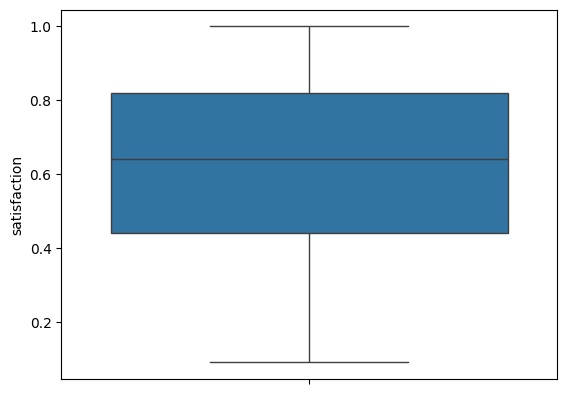

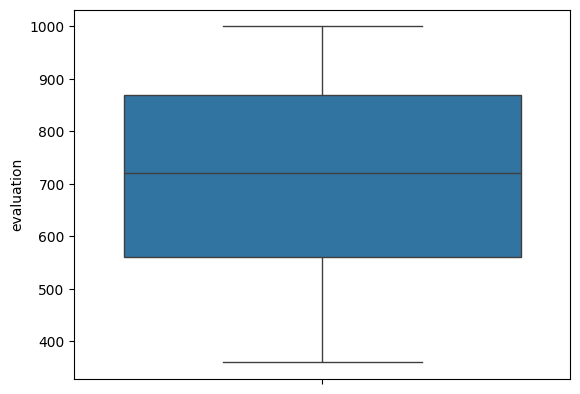

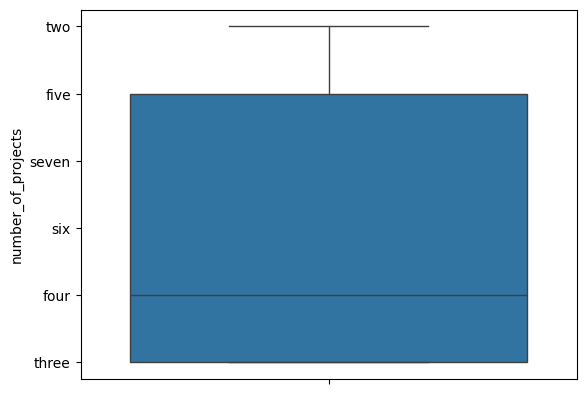

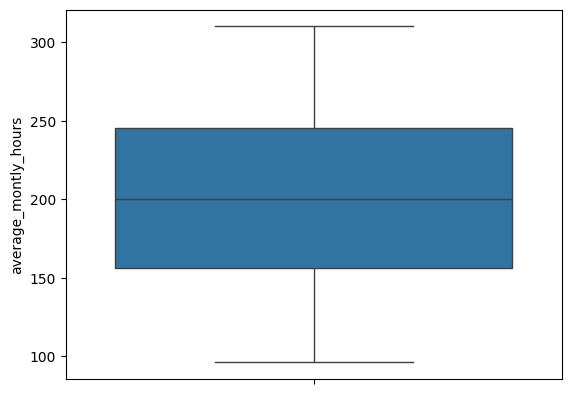

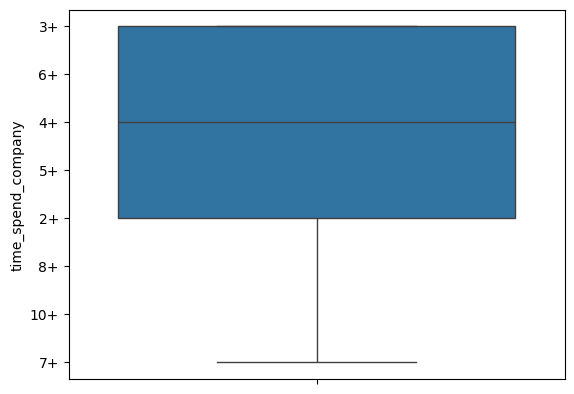

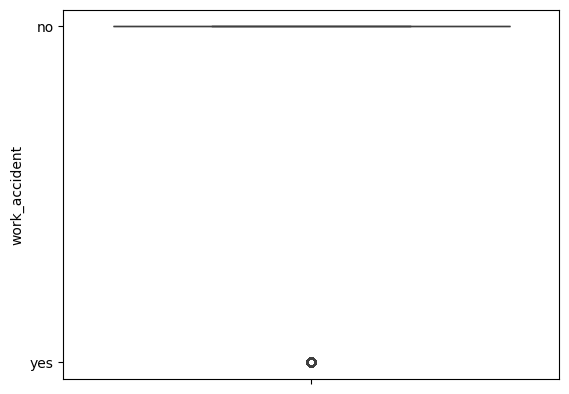

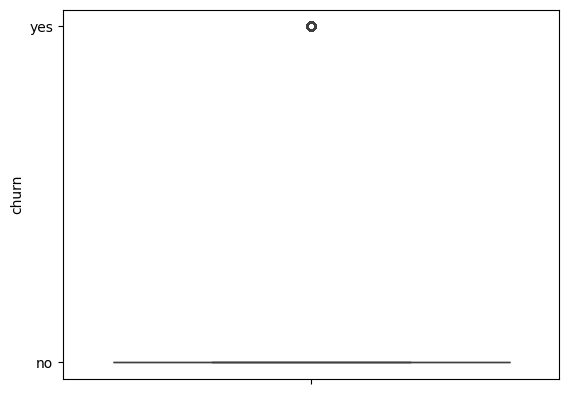

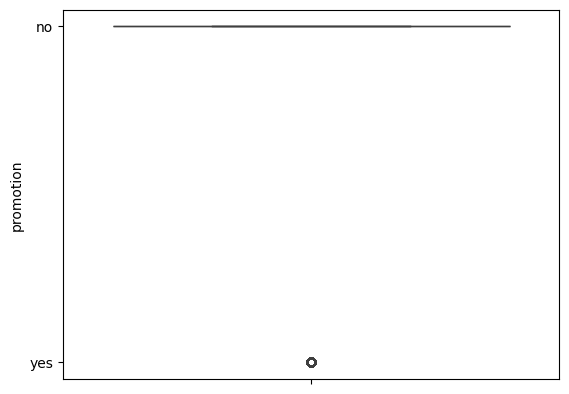

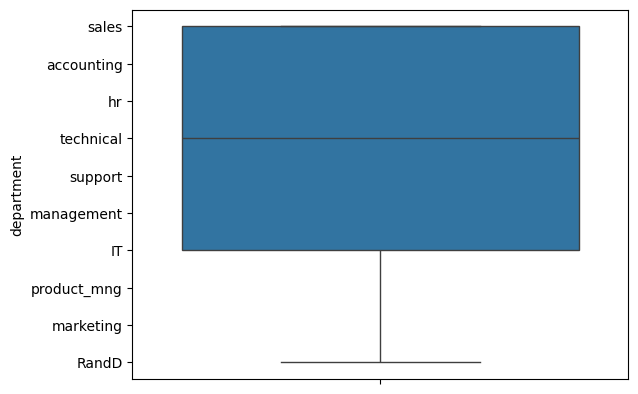

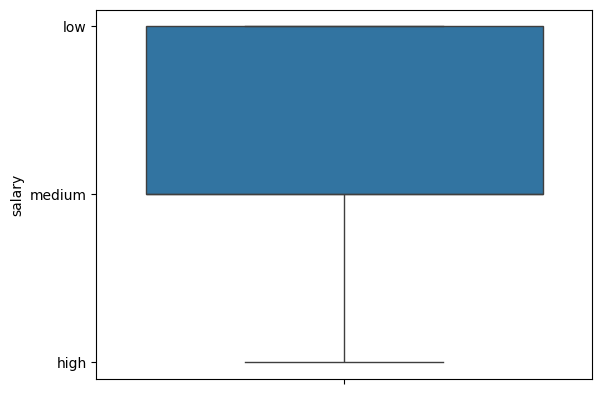

In [23]:
for col in df.columns:
   sns.boxplot(df[col])
   plt.show()

In [26]:
df=df.drop(['work_accident'],axis=1)

In [27]:
df=df.drop(['churn'],axis=1)

In [28]:
df=df.drop(['promotion'],axis=1)

In [29]:
df.columns

Index(['satisfaction', 'evaluation', 'number_of_projects',
       'average_montly_hours', 'time_spend_company', 'department', 'salary'],
      dtype='object')

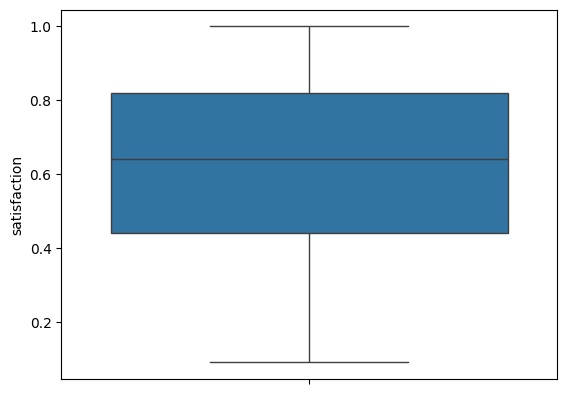

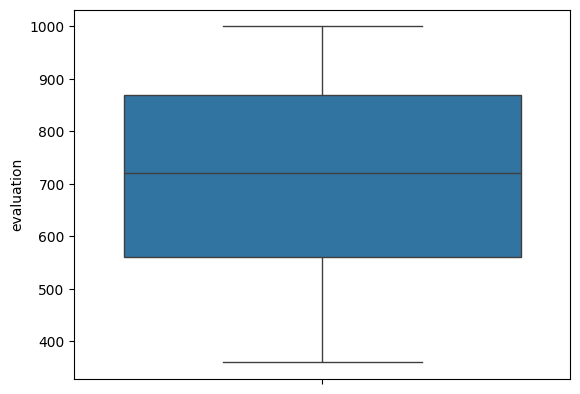

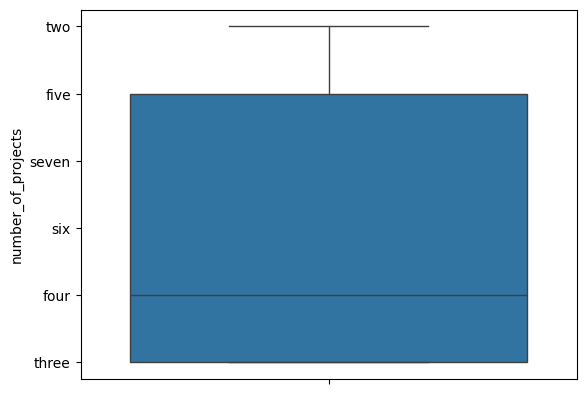

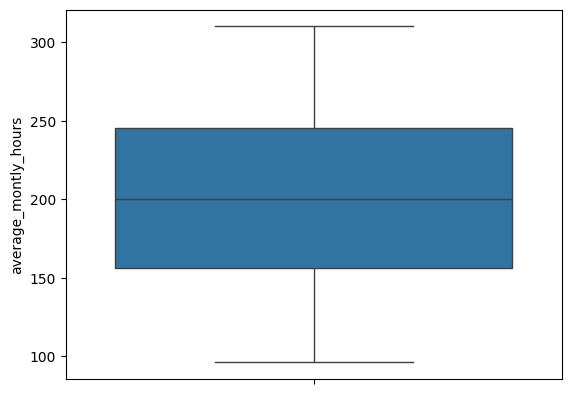

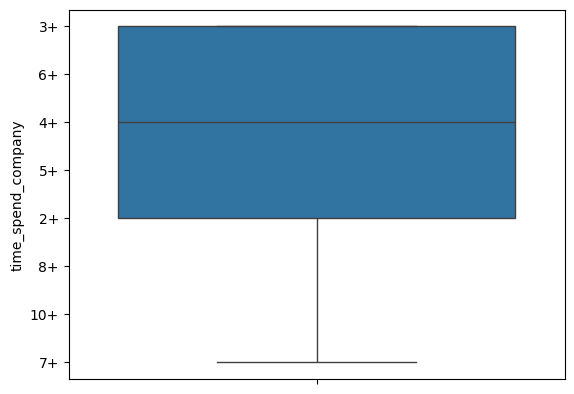

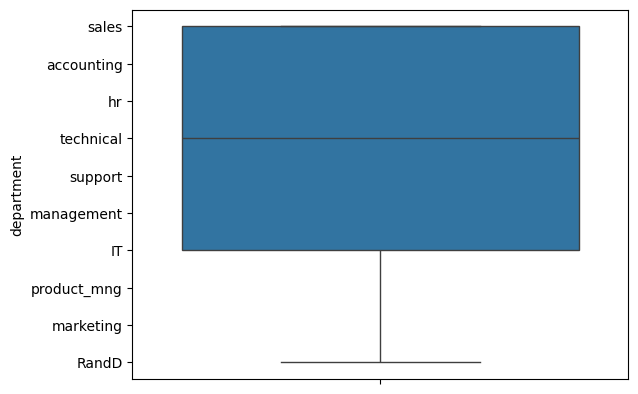

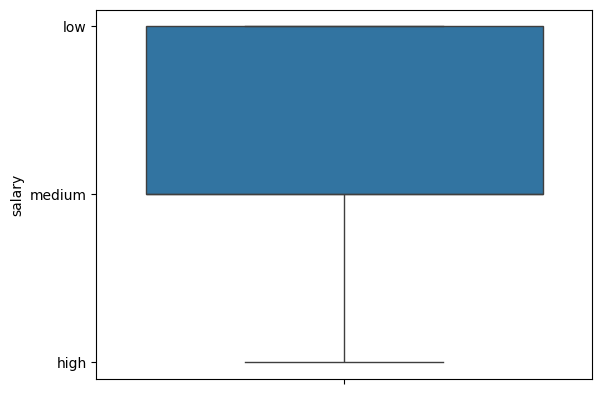

In [30]:
for col in df.columns:
   sns.boxplot(df[col])
   plt.show()